In [ ]:
# 본인 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!ls

TheLittleMermaid.JPG         [2023]_CV_Assignment01.ipynb


[1] Input Image


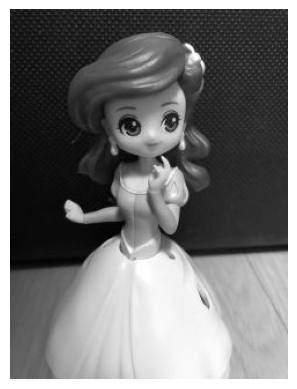

[질문1] 3x3 Sobel 필터 X축 구현
Sobel X Result Image


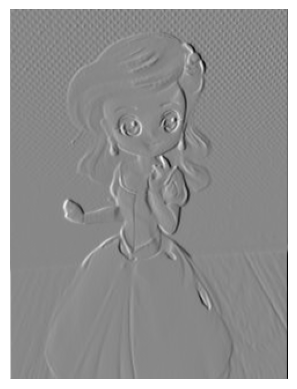

[답안1] Convolution result y1 at (107,99) = -3.26

[질문2] 3x3 Sobel 필터 y축 구현
Sobel Y Result Image


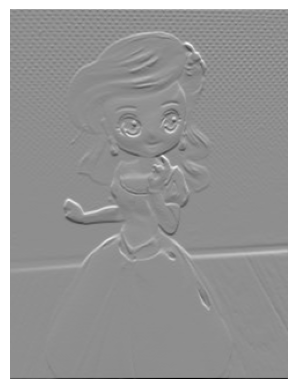

[답안2] Convolution result y2 at (107,99) = 1.89



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.signal import correlate2d
from skimage import io, color


# 입력 영상은 Zip파일 안에서 찾아서 본인 구글 drive에 upload
# 밑에 Path는 본인 구글 드라이브 위치로 설정할 것
RGBImage = io.imread('./TheLittleMermaid.JPG')
GrayImage = color.rgb2gray(RGBImage)

print('[1] Input Image')
plt.axis('off')
plt.imshow(GrayImage, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

###############################################
# [문제1] 3x3 Sobel 필터 X축 필터값 입력 
# [힌트] 왼쪽이 음수, 오른쪽이 양수
###############################################
print(f'[질문1] 3x3 Sobel 필터 X축 구현')
sobelX = np.array((
        [3, 0, -3], # 채워 넣을 것
        [10, 0, -10], # 채워 넣을 것
        [3, 0, -3]),# 채워 넣을 것 
        dtype="float")

y1 = convolve2d(GrayImage, sobelX, 'same')

print('Sobel X Result Image')
plt.axis('off')
plt.imshow(y1, cmap='gray')
plt.show()

print(f'[답안1] Convolution result y1 at (107,99) = {y1[107, 99]:0.2f}\n')

###############################################
# [문제2] 3x3 Sobel 필터 Y축 필터값 입력 
# [힌트] 위쪽이 양수, 아래쪽이 음수
###############################################
print(f'[질문2] 3x3 Sobel 필터 y축 구현')
sobelY = np.array((
        [3, 10, 3], # 채워 넣을 것
        [0, 0, 0], # 채워 넣을 것
        [-3, -10, -3]), # 채워 넣을 것
        dtype="float")

y2 = convolve2d(GrayImage, sobelY, 'same')

print('Sobel Y Result Image')
plt.axis('off')
plt.imshow(y2, cmap='gray')
plt.show()

print(f'[답안2] Convolution result y2 at (107,99) = {y2[107, 99]:0.2f}\n')

In [2]:
# 얼굴 위치 찾기

def findMaxPos(x) :
  maxindex = x.argmax()
  maxpos = np.unravel_index(maxindex, x.shape)
  return maxpos

# 입력 영상에서 얼굴 부분 crop
Face = GrayImage[73:128, 81:152]

plt.axis('off')
plt.imshow(Face, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

###############################################
#[문제3] GrayImage 영상에 Face 값을 이용해서 2D correlation을 수행하여 최대 값 
#        위치를 출력할 것
#[힌트1] 위쪽에 이미 correlate2d를 import함
#[힌트2] 입력 크기에 맞추기 위해 'same' 옵션을 줄 것!
###############################################
print(f'[질문3] correlation을 이용한 위치 찾기 문제')
# 이곳에 코드 구현 할 것
# output_corr = 코드 구현
output_corr = # Reserved for your code

print('# Correlation Result image')
plt.imshow(output_corr)
plt.show()

print(f'[답안3] Max position = {findMaxPos(output_corr)}\n')
# 생각할것: 왜 max값이 얼굴 위치에 나타나지 않느지 고민해 볼 것

###############################################
#[문제4] 영상 정규화 하기 - 방법1: 각자 정규화 하기
#[힌트] 이번 문제는 정규화를 간단하게 평균값으로 뺀 것을 의미 
#       원래 정규화는 평균을 0으로 분산을 1로 만들어 줘야 함
###############################################
print(f'[문제4] 각자 영상 평균값으로 정규화 하기')
#GrayImage2 = 코드 만들어 넣기 (GrayImage의 평균값으로 정규화)
#Face2 = 코드 만들어 넣기 (Face의 평균으로 정규화)
GrayImage2 = # Reserved for your code
Face2 = # Reserved for your code

print('[답안4] Mean value of GrayImage = %0.2f and of Face = %0.2f\n' % (np.mean(GrayImage), np.mean(Face)))

###############################################
#[문제5] 각자 정규화된 GrayImage 영상에 Face 값을 이용해서 2D correlation을 수행하여 최대 값 
#        위치를 출력할 것
#[힌트1] 위쪽에 이미 correlate2d를 import함
#[힌트2] 입력 크기에 맞추기 위해 'same'옵션을 줄 것!
###############################################
print(f'[질문5] 각자 정규화 한뒤에 correlation을 이용한 위치 찾기 문제')
# 이곳에 코드 구현 할 것
# output_corr2 = 코드 구현
output_corr2 = # Reserved for your code

print('# Correlation Result after each normalization')
plt.imshow(output_corr2)
plt.show()

print(f'[답안5] Max position = {findMaxPos(output_corr2)}\n')

###############################################
#[문제6] Face의 평균값으로 정규화된 GrayImage 영상과 Face 영상을 이용해서 2D correlation을 수행하여 최대 값 
#        위치를 출력할 것
#[힌트1] 위 문제와 다르게 Face의 평균 값으로만 정규화 할것
###############################################
print(f'[질문6] 찾고자 하는 Face 평균값으로 정규화 할 경우 위치 결과')
# GrayImage3 = GrayImage - 코드 구현
# Face3 = Face - 코드 구현
GrayImage3 = # Reserved for your code
Face3 = # Reserved for your code

# output_corr3 = 코드 구현
output_corr3 = # Reserved for your code

print('# Correlation Result after Face\'s normalization')
plt.imshow(output_corr3)
plt.show()

print(f'[답안6] Max position = {findMaxPos(output_corr3)}\n')
# 생각할것: 윗 결과와 비교해 볼 것

SyntaxError: invalid syntax (2213290936.py, line 24)

In [ ]:
###############################################
#[문제7] convolution과 correlation의 차이 확인
#        2D Convolution을 사용해서 Face와 가장 유사한 입력 영상의 위치를 찾을 것
#[힌트] 해당 문제의 경우 Face 값으로 입력과 필터 값을 정규화 할 것
###############################################
print(f'[질문7] 찾고자 하는 Face의 위치를 convolution으로 찾아 볼 것')
# output_conv = 코드 작성 (입력: GrayImage3, Face3)
output_conv = # Reserved for your code

print('Convolution Result')
plt.imshow(output_conv)
plt.show()

print(f'[답안7] Max position = {findMaxPos(output_conv)}\n')
# 생각할것: 윗 결과와 비교해 볼 것